In [1]:
import bs4 as bs
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import os
import pickle
import requests

A function to scrape all first north company tickers from www.nasdaqomxnordic.com.

In [2]:
def save_first_north_tickers():
    resp = requests.get('http://www.nasdaqomxnordic.com/shares/listed-companies/first-north')
    soup = bs.BeautifulSoup(resp.text)
    table = soup.find('article', {'class':'nordic-our-listed-companies'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[1].text
        ticker = ticker.replace(' ', '-')
        ticker = ticker+'.ST'
        
        tickers.append(ticker)
        
    with open('first-north-tickers.pickle', 'wb') as f:
        pickle.dump(tickers, f)
        
    return tickers

A function that downloads the history data from yhaoo using the scraped tickers.

In [3]:
def get_data_from_yahoo(reload_data=False):
    if reload_data:
        tickers = save_first_north_tickers()
    else:
        with open('first-north-tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('first-north-dfs'):
        os.makedirs('first-north-dfs')
        
    for ticker in tickers:
        print(ticker)
        try:
            df = web.DataReader(ticker, 'yahoo')
            file_name = 'first-north-dfs/{}.csv'.format(ticker)
            if not os.path.exists(file_name):
                df.to_csv(file_name)
            else:
                print('Already have {}'.format(ticker))
        except:
            print('{} does not exist'.format(ticker))

In [4]:
#get_data_from_yahoo()

Visualizing the data for the company Iconovo.

In [5]:
import matplotlib.pyplot as plt
import mplfinance as mpf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [6]:
ico = pd.read_csv('first-north-dfs/ICO.ST.csv', index_col=0, parse_dates=True)
ico.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-04-06,43.000000,34.500000,38.400002,36.000000,33693,36.000000
2018-04-09,37.000000,33.200001,37.000000,34.799999,14726,34.799999
2018-04-10,34.799999,29.500000,34.799999,34.500000,67172,34.500000
2018-04-11,34.500000,29.600000,34.500000,33.200001,57515,33.200001
2018-04-12,33.400002,30.000000,32.000000,33.400002,6514,33.400002


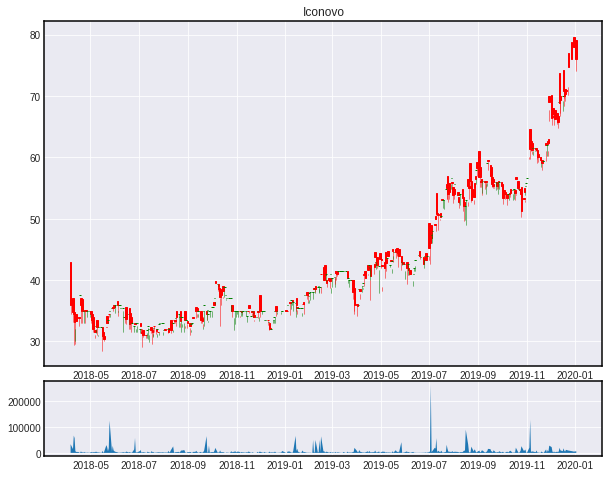

In [7]:
plt.figure(figsize=(10,8))
ax1 = plt.subplot2grid((5,1), (0,0), rowspan=4, colspan=1)
ax1.xaxis_date()
ax2 = plt.subplot2grid((5,1), (4,0), rowspan=1, colspan=1, sharex=ax1)

ico_ohlc = ico.drop(['Volume', 'Adj Close'], axis=1)
ico_ohlc.reset_index(inplace=True)
ico_ohlc['Date'] = ico_ohlc['Date'].map(mdates.date2num)

ico_volume = ico[['Volume']]

candlestick_ohlc(ax1, ico_ohlc.values, width=2, colorup='g')
ax1.set_title('Iconovo')
ax2.fill_between(ico_volume.index.map(mdates.date2num), ico_volume.values.flatten());